In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import re
import random as rd
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from nltk import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import autokeras as ak
from sklearn.model_selection import KFold

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ddayv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ddayv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_excel('./rotulação/TweetsPolitical01 OK OK.xlsx')
df2 = pd.read_excel('./rotulação/TweetsPolitical02 OK OK.xlsx')
df3 = pd.read_excel('./rotulação/TweetsPolitical03 OK OK.xlsx')
df4 = pd.read_excel('./rotulação/TweetsPolitical04 OK OK.xlsx')
df5 = pd.read_excel('./rotulação/TweetsPolitical05 OK OK.xlsx')
df6 = pd.read_excel('./rotulação/TweetsPolitical06 OK OK.xlsx')
df7 = pd.read_excel('./rotulação/TweetsPolitical07 OK OK.xlsx')
df8 = pd.read_excel('./rotulação/TweetsPolitical08 OK OK.xlsx')
df9 = pd.read_excel('./rotulação/TweetsPolitical09 OK OK.xlsx')
df10 = pd.read_excel('./rotulação/TweetsPolitical10 OK OK.xlsx')
df11 = pd.read_excel('./rotulação/TweetsPolitical11 OK OK.xlsx')
df12 = pd.read_excel('./rotulação/TweetsPolitical12 OK OK.xlsx')
df13 = pd.read_excel('./rotulação/TweetsPolitical13 OK OK.xlsx')
df14 = pd.read_excel('./rotulação/TweetsPolitical14 OK OK.xlsx')
df15 = pd.read_excel('./rotulação/TweetsPolitical15 OK OK.xlsx')

lista = [df,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15]

df_all = pd.concat(lista)
df_all.shape

(12670, 2)

In [3]:
df_all.head()

,Tweet,Polaridade
0,- #CaoNossoDeCadaDia #Novo - Vanessa Mandotti ...,0.0
1,"- Bola pra frente que amanhã é outro dia, outr...",1.0
2,- Cara de mal? Acho que não... Apenas um corte...,1.0
3,""" #PCdoB O PARTIDO QUE FAZ A DIFERENÇA: LEAL E...",1.0
4,"""@camaradamae: #PCdoB o Partido da coragem ! ...",1.0


In [4]:
df_all.isnull().sum()

Tweet         2
Polaridade    2
dtype: int64

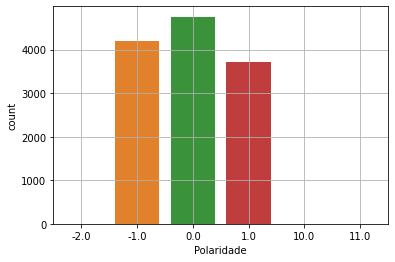

In [5]:
df_all = df_all.dropna()

sns.countplot(data=df_all, x='Polaridade')
plt.grid()

In [6]:
df_all = df_all.reset_index()
df_all

,index,Tweet,Polaridade
0,0,- #CaoNossoDeCadaDia #Novo - Vanessa Mandotti ...,0.0
1,1,"- Bola pra frente que amanhã é outro dia, outr...",1.0
2,2,- Cara de mal? Acho que não... Apenas um corte...,1.0
3,3,""" #PCdoB O PARTIDO QUE FAZ A DIFERENÇA: LEAL E...",1.0
4,4,"""@camaradamae: #PCdoB o Partido da coragem ! ...",1.0
...,...,...,...
12663,78,Bom diaa #SD Moisés Sou Boina Preta e Não Tem...,1.0
12664,79,"Sei que leve por divisa esse ""V"" que simboliza...",1.0
12665,80,L'ambiance d'hier au stade c'est grace ao Maca...,1.0
12666,81,Mais tarde tem mais SD no Chopp E Cia...hoje é...,1.0


In [7]:
df_all = df_all.drop(columns=['index'])
df_all.drop(df_all[df_all['Polaridade'] == 11].index, inplace=True)
df_all.drop(df_all[df_all['Polaridade'] == -2].index, inplace=True)
df_all.drop(df_all[df_all['Polaridade'] == 10].index, inplace=True)

df_all['Polaridade'].unique()

array([ 0.,  1., -1.])

In [8]:
Tweet = df_all['Tweet']
polarity = np.asarray(df_all['Polaridade'])

np.unique(polarity)

array([-1.,  0.,  1.])

In [9]:
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(Tweet)

tfidf_transformer = TfidfTransformer()
X_train_transform = tfidf_transformer.fit_transform(X_train) # Aplicando o TF-IDF
X_train_transform.shape

(12665, 24464)

In [10]:
#X_train, X_test, Y_train, Y_test = train_test_split(X_train_transform, polarity, test_size=0.3)

kf = KFold(n_splits=10)
clf = MultinomialNB()

for train_index, test_index in kf.split(X_train_transform):
    X_train, X_test = X_train_transform[train_index], X_train_transform[test_index]
    y_train, y_test = polarity[train_index], polarity[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print(clf.score(X_test, y_test))


0.5445935280189423
0.5698500394632992
0.6479873717442778
0.6535122336227308
0.430939226519337
0.5742496050552922
0.5876777251184834
0.5932069510268563
0.5789889415481833
0.6058451816745656


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train_transform, polarity, test_size=0.3)

In [12]:
clf = MultinomialNB()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

print(metrics.classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

        -1.0       0.55      0.83      0.66      1258
         0.0       0.69      0.65      0.67      1427
         1.0       0.68      0.35      0.47      1115

    accuracy                           0.62      3800
   macro avg       0.64      0.61      0.60      3800
weighted avg       0.64      0.62      0.61      3800



In [13]:
5.786850803791968/10

0.5786850803791969

In [14]:
def pre_X(frases):
    lista = []
    
    for frase in frases:
        lista.append(frase)
        
    return lista

def pre_Y(number):
    lista = []
    
    for numb in number:
        lista.append(numb)
    
    return lista


In [15]:
def set_array(frases):
    
    vocab = []
    palavras = []
    for frase in frases:
        
        text_array = remove_user(frase)
        text_array = Tokenize(text_array)
        text_array = text_array.split(' ')
        for i in range(len(text_array)):
            vocab.append(text_array[i])
    
    
        
    return vocab

def Tokenize(f):     ## Pre-processando a frase
    
    ## Colocando em minusculo
    ## Retirando a pontuaçao
    ## Retirando as StopWords
    
    f = f.lower().replace('\n', '').replace('-','').replace('#','').replace('.','').replace(',','').replace('!','').replace('r\n','').replace('  ','')
    token = RegexpTokenizer(r"\w+")
    f = token.tokenize(f)
    
    stop_words = set(stopwords.words('portuguese'))
    
    new_word = [word for word in f if not word in stop_words]
    
    return ' '.join(new_word)

def remove_user(frase):

    return re.sub('@\w+','',frase)

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(3 , activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [17]:
Tweet = Tweet.apply(remove_user)
Tweet_preprocessed = Tweet.apply(Tokenize)


In [38]:
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(Tweet_preprocessed)

tfidf_transformer = TfidfTransformer()
X_train_transform = tfidf_transformer.fit_transform(X_train) # Aplicando o TF-IDF


X_train_, X_test_, Y_train, Y_test = train_test_split(X_train_transform, polarity, test_size=0.3)

X_train_

<8865x25943 sparse matrix of type '<class 'numpy.float64'>'
	with 78166 stored elements in Compressed Sparse Row format>

In [39]:
X_test_

<3800x25943 sparse matrix of type '<class 'numpy.float64'>'
	with 33630 stored elements in Compressed Sparse Row format>

In [28]:
one = OneHotEncoder(sparse=False)

In [29]:
y_one = one.fit_transform(Y_train.reshape(-1,1))
y_one_ = one.fit_transform(Y_test.reshape(-1,1))

In [129]:
fit = model.fit(X_train.todense(), y_one, epochs=5, validation_data=(X_test.todense(), y_one_))

Epoch 1/5
278/278 [==============================] - 4s 13ms/step - loss: 1.0296 - accuracy: 0.4772 - val_loss: 0.8967 - val_accuracy: 0.5945
Epoch 2/5
278/278 [==============================] - 3s 11ms/step - loss: 0.6861 - accuracy: 0.7365 - val_loss: 0.8655 - val_accuracy: 0.6168
Epoch 3/5
278/278 [==============================] - 3s 11ms/step - loss: 0.3486 - accuracy: 0.8858 - val_loss: 1.0505 - val_accuracy: 0.6108
Epoch 4/5
278/278 [==============================] - 3s 11ms/step - loss: 0.1759 - accuracy: 0.9482 - val_loss: 1.2550 - val_accuracy: 0.6024
Epoch 5/5
278/278 [==============================] - 3s 11ms/step - loss: 0.1070 - accuracy: 0.9719 - val_loss: 1.4776 - val_accuracy: 0.5979


In [ ]:
predicted = model.predict(X_test.todense())

print(classification_report(np.argmax(y_one_, axis=1), np.argmax(predicted, axis=1)))

In [30]:
kf = KFold(n_splits=10)
val_accuracy = []
index = []
cont = 0

for train_index, test_index in kf.split(X_train_transform):
    cont += 1
    
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(3 , activation='softmax')
    
    ])
    
    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.categorical_crossentropy,
        metrics=['accuracy']
    )
    
    X_train, X_test = X_train_transform[train_index], X_train_transform[test_index]
    y_train, y_test = polarity[train_index], polarity[test_index]
    y_train_one = one.fit_transform(y_train.reshape(-1,1))
    y_teste_one = one.fit_transform(y_test.reshape(-1,1))
    
    print("Iter: ",cont)
    print(" ")
    
    fit = model.fit(X_train.todense(), y_train_one, epochs=5, validation_data=(X_test.todense(), y_teste_one))
    print(" ")
    val_accuracy.append(fit.history['val_accuracy'])
    
    index.append((train_index,test_index))


Iter:  1
 
Epoch 1/5
357/357 [==============================] - 3s 9ms/step - loss: 1.0193 - accuracy: 0.4798 - val_loss: 0.8828 - val_accuracy: 0.6527
Epoch 2/5
357/357 [==============================] - 3s 9ms/step - loss: 0.7399 - accuracy: 0.6910 - val_loss: 0.9535 - val_accuracy: 0.5351
Epoch 3/5
357/357 [==============================] - 3s 9ms/step - loss: 0.4218 - accuracy: 0.8565 - val_loss: 1.1046 - val_accuracy: 0.5328
Epoch 4/5
357/357 [==============================] - 3s 9ms/step - loss: 0.2367 - accuracy: 0.9283 - val_loss: 1.3747 - val_accuracy: 0.5233
Epoch 5/5
357/357 [==============================] - 3s 8ms/step - loss: 0.1387 - accuracy: 0.9628 - val_loss: 1.5627 - val_accuracy: 0.5257
 
Iter:  2
 
Epoch 1/5
357/357 [==============================] - 3s 9ms/step - loss: 1.0085 - accuracy: 0.4864 - val_loss: 0.8625 - val_accuracy: 0.6354
Epoch 2/5
357/357 [==============================] - 3s 9ms/step - loss: 0.6612 - accuracy: 0.7426 - val_loss: 0.8674 - val_accura

In [31]:
def media_std(val_accuracy):
    matrix_acc = np.array(val_accuracy)
    
    for i in range(len(matrix_acc)):
        print(f' Fold: {i}\tMédia: {matrix_acc[i].mean()}\tStd: {matrix_acc[i].std()} ')
        
media_std(val_accuracy) #arquitetura de cima

 Fold: 0	Média: 0.5539068698883056	Std: 0.049600570458135006 
 Fold: 1	Média: 0.6222572922706604	Std: 0.007363471724017882 
 Fold: 2	Média: 0.597000777721405	Std: 0.013079931526220214 
 Fold: 3	Média: 0.6350434064865113	Std: 0.0314385548171895 
 Fold: 4	Média: 0.4958168983459473	Std: 0.025596572054295278 
 Fold: 5	Média: 0.5491311192512512	Std: 0.012433168983839189 
 Fold: 6	Média: 0.552764618396759	Std: 0.012312150997220004 
 Fold: 7	Média: 0.5691943049430848	Std: 0.007004669266169217 
 Fold: 8	Média: 0.5612954139709473	Std: 0.00883264985594135 
 Fold: 9	Média: 0.556872034072876	Std: 0.012378847021972639 


In [5]:
np.array([0.049600570458135006, 
0.007363471724017882, 
0.013079931526220214, 
0.0314385548171895, 
0.025596572054295278, 
0.012433168983839189, 
0.012312150997220004, 
0.007004669266169217, 
0.00883264985594135, 
0.012378847021972639]).mean()

0.018004058670500027

In [4]:
np.array([0.5539068698883056, 0.6222572922706604,0.597000777721405,0.6350434064865113,0.4958168983459473,0.5491311192512512,0.552764618396759,0.5691943049430848,0.5612954139709473,0.556872034072876]).mean()

0.5693282735347749

In [32]:
best_ = []
for i in range(len(val_accuracy)):
    best_acc = 0
    for j in range(5):
        if val_accuracy[i][j] > best_acc:
            best_acc = val_accuracy[i][j]
    best_.append(best_acc)

best_

[0.652722954750061,
 0.6353591084480286,
 0.614838182926178,
 0.6661404967308044,
 0.5288082361221313,
 0.5647709369659424,
 0.5742496252059937,
 0.5829383730888367,
 0.5750395059585571,
 0.5718799233436584]

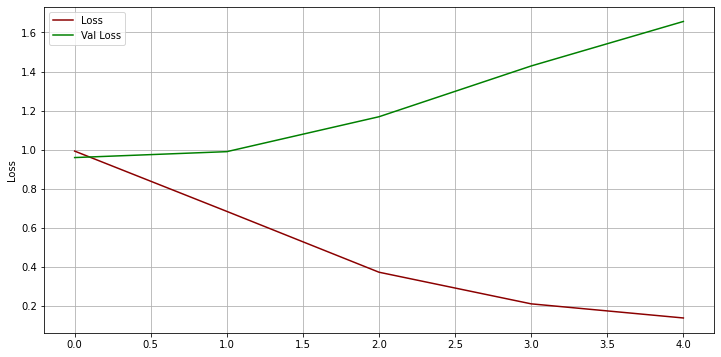

In [33]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

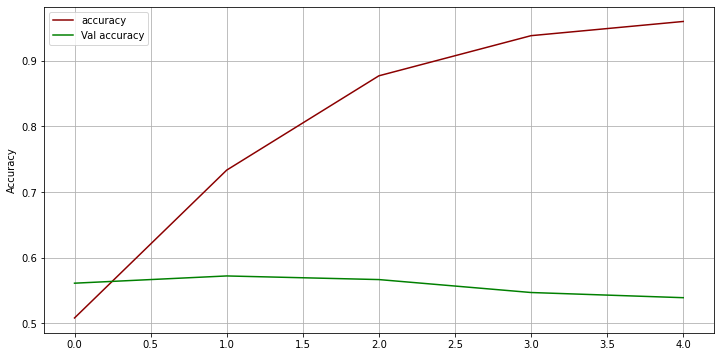

In [34]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()

In [43]:
vectorize_layer = TextVectorization(
 max_tokens=15000,
 output_mode='int',
 output_sequence_length=len(max(df_all['Tweet'])))

vocab = set_array(df_all['Tweet'])

vectorize_layer.adapt(np.unique(vocab))
len(vectorize_layer.get_vocabulary())


15000

In [44]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,mask_zero=True),
    
    tf.keras.layers.LSTM(50, activation='relu' ,return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.LSTM(20 , activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.LSTM(20 , activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.LSTM(10 , activation='tanh', return_sequences=True),
    
    tf.keras.layers.LSTM(10 , activation='tanh'),
    
    tf.keras.layers.Dense(3, activation='softmax')
])


model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(Tweet_preprocessed, polarity, test_size=0.3)

In [46]:
X_train.shape

(8865,)

In [2]:
y_one = one.fit_transform(Y_train.reshape(-1,1))
y_one_ = one.fit_transform(Y_test.reshape(-1,1))

NameError: name 'one' is not defined

In [ ]:
fit = model.fit(X_train, y_one, epochs=5, validation_data=(X_test, y_one_))

In [ ]:
predicted = model.predict(X_test)

print(classification_report(np.argmax(y_one_, axis=1), np.argmax(predicted, axis=1)))

In [48]:
kf = KFold(n_splits=10)
val_accuracy = []
index = []
cont = 0

for train_index, test_index in kf.split(Tweet_preprocessed):
    cont += 1
    
    model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,mask_zero=True),
    
    tf.keras.layers.LSTM(50, activation='relu' ,return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.LSTM(20 , activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.LSTM(20 , activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.LSTM(10 , activation='tanh', return_sequences=True),
    
    tf.keras.layers.LSTM(10 , activation='tanh', return_sequences=True),
    
    tf.keras.layers.LSTM(10 , activation='tanh'),
    
    tf.keras.layers.Dense(3, activation='softmax')
    
    ])


    model.compile(
        optimizer= tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.categorical_crossentropy,
        metrics=['accuracy']
    )
    Tweet_preprocessed = np.asarray(pre_X(Tweet_preprocessed))
    
    X_train, X_test = Tweet_preprocessed[train_index], Tweet_preprocessed[test_index]
    y_train, y_test = polarity[train_index], polarity[test_index]
    y_train_one = one.fit_transform(y_train.reshape(-1,1))
    y_teste_one = one.fit_transform(y_test.reshape(-1,1))
    
    print("Iter: ",cont)
    print(" ")
    
    fit = model.fit( X_train, y_train_one, epochs=5, batch_size=128 ,validation_data=(X_test, y_teste_one)) 
    print(" ")
    val_accuracy.append(fit.history['val_accuracy'])
    
    index.append((train_index,test_index))


Iter:  1
 
Epoch 1/5
90/90 [==============================] - 29s 319ms/step - loss: 1.0925 - accuracy: 0.3875 - val_loss: 1.0913 - val_accuracy: 0.4270
Epoch 2/5
90/90 [==============================] - 26s 284ms/step - loss: 1.0217 - accuracy: 0.5033 - val_loss: 1.1017 - val_accuracy: 0.5249
Epoch 3/5
90/90 [==============================] - 27s 300ms/step - loss: 0.8997 - accuracy: 0.5946 - val_loss: 1.0977 - val_accuracy: 0.5217
Epoch 4/5
90/90 [==============================] - 28s 308ms/step - loss: 0.7982 - accuracy: 0.6556 - val_loss: 1.2285 - val_accuracy: 0.4672
Epoch 5/5
90/90 [==============================] - 27s 301ms/step - loss: 0.7038 - accuracy: 0.7193 - val_loss: 1.2632 - val_accuracy: 0.4657
 
Iter:  2
 
Epoch 1/5
90/90 [==============================] - 31s 343ms/step - loss: 1.0910 - accuracy: 0.4009 - val_loss: 1.0929 - val_accuracy: 0.4822
Epoch 2/5
90/90 [==============================] - 29s 325ms/step - loss: 1.0104 - accuracy: 0.5126 - val_loss: 1.0596 - val

In [49]:
media_std(val_accuracy)

 Fold: 0	Média: 0.48129438757896426	Std: 0.037205830169904 
 Fold: 1	Média: 0.5093922674655914	Std: 0.031119898194740002 
 Fold: 2	Média: 0.46424624919891355	Std: 0.02647702428892829 
 Fold: 3	Média: 0.569218635559082	Std: 0.026007011367929954 
 Fold: 4	Média: 0.3695343345403671	Std: 0.10812471703690046 
 Fold: 5	Média: 0.4729857802391052	Std: 0.038558891667122536 
 Fold: 6	Média: 0.47251185178756716	Std: 0.04244699124189028 
 Fold: 7	Média: 0.48104265332221985	Std: 0.01833496868078754 
 Fold: 8	Média: 0.3995260655879974	Std: 0.011219764147013542 
 Fold: 9	Média: 0.46129541993141177	Std: 0.010609253135448311 


In [6]:
np.array([0.48129438757896426,
0.5093922674655914,  
0.46424624919891355,
0.569218635559082,  
0.3695343345403671,  
0.4729857802391052,   
0.47251185178756716,   
0.48104265332221985,  
0.3995260655879974,   
0.46129541993141177]).mean()

0.468104764521122

In [7]:
np.array([0.037205830169904, 0.031119898194740002,  0.02647702428892829, 0.026007011367929954,0.10812471703690046, 0.038558891667122536,0.04244699124189028, 0.01833496868078754,0.011219764147013542,0.010609253135448311 ]).mean()   

0.03501043499306649

In [50]:
best_ = []
for i in range(len(val_accuracy)):
    best_acc = 0
    for j in range(5):
        if val_accuracy[i][j] > best_acc:
            best_acc = val_accuracy[i][j]
    best_.append(best_acc)

best_

[0.5248618721961975,
 0.5643251538276672,
 0.4964483082294464,
 0.5966851115226746,
 0.4435674846172333,
 0.5023696422576904,
 0.5047393441200256,
 0.5,
 0.41706159710884094,
 0.47788310050964355]

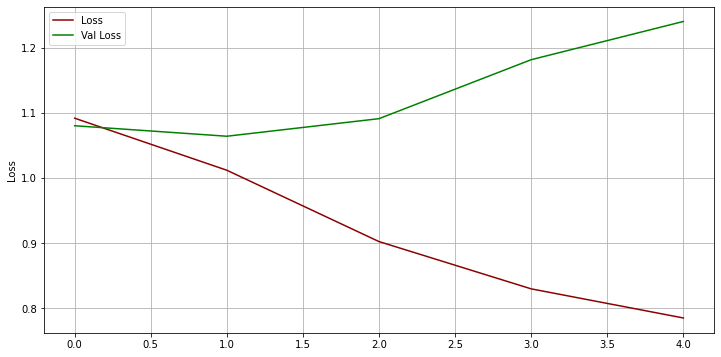

In [51]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

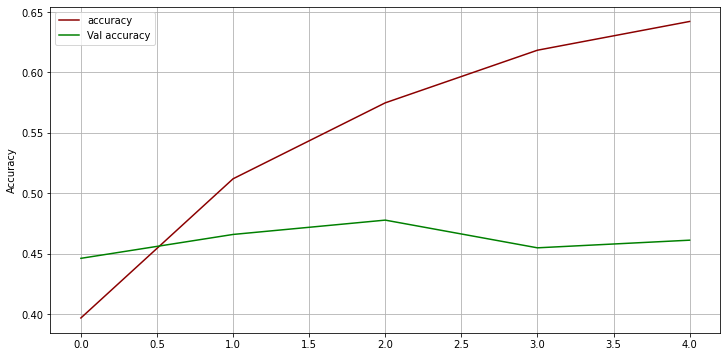

In [52]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()

## BDR

In [25]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,
        mask_zero=True),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

X_train, X_test, Y_train, Y_test = train_test_split(Tweet_preprocessed, polarity, test_size=0.3)
y_one = one.fit_transform(Y_train.reshape(-1,1))
y_one_ = one.transform(Y_test.reshape(-1,1))

In [26]:
fit = model.fit(np.asarray(pre_X(X_train)), y_one, epochs=10, batch_size=128 ,validation_data=(np.asarray(pre_X(X_test)), y_one_))

Epoch 1/10
70/70 [==============================] - 17s 243ms/step - loss: 1.0589 - accuracy: 0.4538 - val_loss: 0.9810 - val_accuracy: 0.5229
Epoch 2/10
70/70 [==============================] - 16s 223ms/step - loss: 0.8266 - accuracy: 0.6259 - val_loss: 0.9349 - val_accuracy: 0.5779
Epoch 3/10
70/70 [==============================] - 16s 226ms/step - loss: 0.5535 - accuracy: 0.7894 - val_loss: 1.0263 - val_accuracy: 0.5671
Epoch 4/10
70/70 [==============================] - 16s 231ms/step - loss: 0.3464 - accuracy: 0.8769 - val_loss: 1.2646 - val_accuracy: 0.5582
Epoch 5/10
70/70 [==============================] - 17s 236ms/step - loss: 0.2443 - accuracy: 0.9144 - val_loss: 1.3851 - val_accuracy: 0.5566
Epoch 6/10
70/70 [==============================] - 15s 220ms/step - loss: 0.1885 - accuracy: 0.9311 - val_loss: 1.5831 - val_accuracy: 0.5500
Epoch 7/10
70/70 [==============================] - 16s 235ms/step - loss: 0.1598 - accuracy: 0.9442 - val_loss: 1.6876 - val_accuracy: 0.5445

In [ ]:
predicted = model.predict(X_test)

print(classification_report(np.argmax(y_one_, axis=1), np.argmax(predicted, axis=1)))

In [54]:
kf = KFold(n_splits=10)
val_accuracy = []
index = []
cont = 0

for train_index, test_index in kf.split(Tweet_preprocessed):
    cont += 1
    
    model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,
        mask_zero=True),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
    
    ])

    model.compile(
        optimizer= tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.categorical_crossentropy,
        metrics=['accuracy']
    )
    
    Tweet_preprocessed = np.asarray(pre_X(Tweet_preprocessed))
    
    X_train, X_test = Tweet_preprocessed[train_index], Tweet_preprocessed[test_index]
    y_train, y_test = polarity[train_index], polarity[test_index]
    y_train_one = one.fit_transform(y_train.reshape(-1,1))
    y_teste_one = one.fit_transform(y_test.reshape(-1,1))
    
    print("Iter: ",cont)
    print(" ")
    
    fit = model.fit( X_train, y_train_one, epochs=5, batch_size=128 ,validation_data=(X_test, y_teste_one)) 
    print(" ")
    val_accuracy.append(fit.history['val_accuracy'])
    
    index.append((train_index,test_index))


Iter:  1
 
Epoch 1/5
90/90 [==============================] - 67s 740ms/step - loss: 1.0317 - accuracy: 0.4763 - val_loss: 0.9671 - val_accuracy: 0.5927
Epoch 2/5
90/90 [==============================] - 65s 720ms/step - loss: 0.7994 - accuracy: 0.6538 - val_loss: 0.9698 - val_accuracy: 0.5896
Epoch 3/5
90/90 [==============================] - 64s 708ms/step - loss: 0.5489 - accuracy: 0.7862 - val_loss: 1.2317 - val_accuracy: 0.4680
Epoch 4/5
90/90 [==============================] - 63s 697ms/step - loss: 0.3772 - accuracy: 0.8602 - val_loss: 1.5132 - val_accuracy: 0.4428
Epoch 5/5
90/90 [==============================] - 64s 708ms/step - loss: 0.2819 - accuracy: 0.8930 - val_loss: 1.5460 - val_accuracy: 0.4901
 
Iter:  2
 
Epoch 1/5
90/90 [==============================] - 67s 744ms/step - loss: 1.0254 - accuracy: 0.4695 - val_loss: 0.9779 - val_accuracy: 0.5785
Epoch 2/5
90/90 [==============================] - 63s 703ms/step - loss: 0.8185 - accuracy: 0.6342 - val_loss: 0.9806 - val

In [55]:
media_std(val_accuracy)

 Fold: 0	Média: 0.5166535079479218	Std: 0.0626611504312289 
 Fold: 1	Média: 0.5733228206634522	Std: 0.009596632921266102 
 Fold: 2	Média: 0.48224152326583863	Std: 0.026385583398524627 
 Fold: 3	Média: 0.6123125433921814	Std: 0.031378264143979935 
 Fold: 4	Média: 0.4236779808998108	Std: 0.04364691067164279 
 Fold: 5	Média: 0.5235386967658997	Std: 0.01780600137282382 
 Fold: 6	Média: 0.5067930579185486	Std: 0.020048882671699943 
 Fold: 7	Média: 0.5243285953998565	Std: 0.02789282955916631 
 Fold: 8	Média: 0.4979462862014771	Std: 0.028934553293534372 
 Fold: 9	Média: 0.4848341166973114	Std: 0.029387277740615322 


In [9]:
np.array([0.5166535079479218,
0.5733228206634522, 
0.48224152326583863,
0.6123125433921814, 
0.4236779808998108,  
0.5235386967658997, 
0.5067930579185486,
0.5243285953998565,
0.4979462862014771, 
0.4848341166973114]).mean()

0.5145649129152299

In [11]:
np.array([0.0626611504312289, 
0.009596632921266102, 
0.026385583398524627, 
0.031378264143979935, 
0.04364691067164279,
0.01780600137282382, 
0.020048882671699943, 
0.02789282955916631, 
0.028934553293534372, 
0.029387277740615322]).mean() 

0.029773808620448216

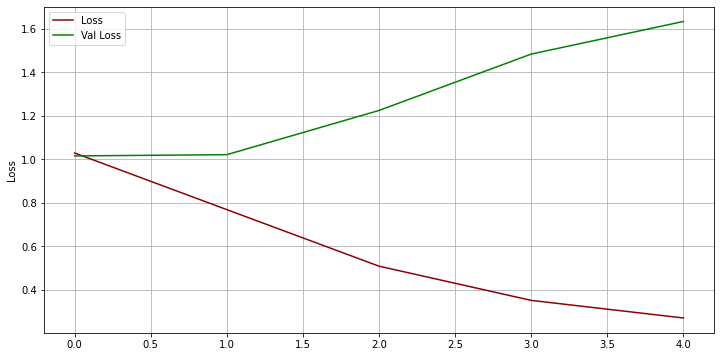

In [56]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

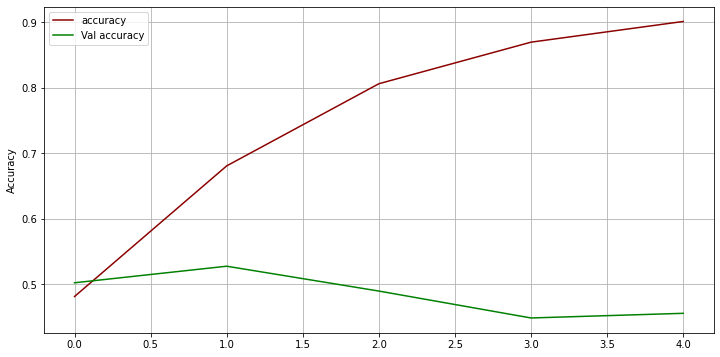

In [57]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()

## Conv 1D

In [22]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,
        mask_zero=True),
    
    tf.keras.layers.Conv1D(24,6, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')   
])

model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

X_train, X_test, Y_train, Y_test = train_test_split(Tweet_preprocessed, polarity, test_size=0.3)
y_one = one.fit_transform(Y_train.reshape(-1,1))
y_one_ = one.transform(Y_test.reshape(-1,1))

In [23]:
fit = model.fit(np.asarray(pre_X(X_train)), y_one, epochs=15, batch_size=256 ,validation_data=(np.asarray(pre_X(X_test)), y_one_))

Epoch 1/15
35/35 [==============================] - 2s 48ms/step - loss: 1.0881 - accuracy: 0.3968 - val_loss: 1.0676 - val_accuracy: 0.4358
Epoch 2/15
35/35 [==============================] - 2s 46ms/step - loss: 1.0188 - accuracy: 0.4929 - val_loss: 0.9864 - val_accuracy: 0.5171
Epoch 3/15
35/35 [==============================] - 2s 46ms/step - loss: 0.8680 - accuracy: 0.5752 - val_loss: 0.9650 - val_accuracy: 0.5184
Epoch 4/15
35/35 [==============================] - 2s 44ms/step - loss: 0.7182 - accuracy: 0.6437 - val_loss: 1.0253 - val_accuracy: 0.5224
Epoch 5/15
35/35 [==============================] - 2s 47ms/step - loss: 0.6088 - accuracy: 0.7089 - val_loss: 1.1373 - val_accuracy: 0.5079
Epoch 6/15
35/35 [==============================] - 2s 45ms/step - loss: 0.5137 - accuracy: 0.7849 - val_loss: 1.2374 - val_accuracy: 0.5132
Epoch 7/15
35/35 [==============================] - 2s 45ms/step - loss: 0.4397 - accuracy: 0.8303 - val_loss: 1.3466 - val_accuracy: 0.5129
Epoch 8/15
35

In [ ]:
predicted = model.predict(X_test)

print(classification_report(np.argmax(y_one_, axis=1), np.argmax(predicted, axis=1)))

In [58]:
kf = KFold(n_splits=10)
val_accuracy = []
index = []
cont = 0

for train_index, test_index in kf.split(Tweet_preprocessed):
    cont += 1
    
    model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,
        mask_zero=True),
    
    tf.keras.layers.Conv1D(24,6, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')   
    
    ])

    model.compile(
        optimizer= tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.categorical_crossentropy,
        metrics=['accuracy']
    )
    
    Tweet_preprocessed = np.asarray(pre_X(Tweet_preprocessed))
    
    X_train, X_test = Tweet_preprocessed[train_index], Tweet_preprocessed[test_index]
    y_train, y_test = polarity[train_index], polarity[test_index]
    y_train_one = one.fit_transform(y_train.reshape(-1,1))
    y_teste_one = one.fit_transform(y_test.reshape(-1,1))
    
    print("Iter: ",cont)
    print(" ")
    
    fit = model.fit( X_train, y_train_one, epochs=5, batch_size=128 ,validation_data=(X_test, y_teste_one)) 
    print(" ")
    val_accuracy.append(fit.history['val_accuracy'])
    
    index.append((train_index,test_index))


Iter:  1
 
Epoch 1/5
90/90 [==============================] - 4s 43ms/step - loss: 1.0706 - accuracy: 0.4267 - val_loss: 0.9806 - val_accuracy: 0.5833
Epoch 2/5
90/90 [==============================] - 4s 42ms/step - loss: 0.9136 - accuracy: 0.5562 - val_loss: 0.9866 - val_accuracy: 0.5493
Epoch 3/5
90/90 [==============================] - 4s 46ms/step - loss: 0.7159 - accuracy: 0.6864 - val_loss: 1.2072 - val_accuracy: 0.4688
Epoch 4/5
90/90 [==============================] - 4s 49ms/step - loss: 0.5065 - accuracy: 0.8085 - val_loss: 1.2990 - val_accuracy: 0.4925
Epoch 5/5
90/90 [==============================] - 5s 51ms/step - loss: 0.3438 - accuracy: 0.8731 - val_loss: 1.6258 - val_accuracy: 0.4499
 
Iter:  2
 
Epoch 1/5
90/90 [==============================] - 4s 42ms/step - loss: 1.0700 - accuracy: 0.4361 - val_loss: 1.0436 - val_accuracy: 0.5383
Epoch 2/5
90/90 [==============================] - 3s 39ms/step - loss: 0.8945 - accuracy: 0.5828 - val_loss: 1.0138 - val_accuracy: 0.5

In [59]:
media_std(val_accuracy)

 Fold: 0	Média: 0.5087608516216278	Std: 0.050046182571689204 
 Fold: 1	Média: 0.550276255607605	Std: 0.01749537431159965 
 Fold: 2	Média: 0.48981847167015075	Std: 0.03506900065629974 
 Fold: 3	Média: 0.581057608127594	Std: 0.019699423030629607 
 Fold: 4	Média: 0.3979479134082794	Std: 0.0822343953430962 
 Fold: 5	Média: 0.4791469216346741	Std: 0.07310742131806822 
 Fold: 6	Média: 0.4830963611602783	Std: 0.014790986183348157 
 Fold: 7	Média: 0.5252764582633972	Std: 0.01711710414242442 
 Fold: 8	Média: 0.4450236916542053	Std: 0.052045504822659384 
 Fold: 9	Média: 0.48688783049583434	Std: 0.022671893755531875 


In [13]:
np.array([0.5087608516216278, 
0.550276255607605, 
0.48981847167015075, 
0.581057608127594,
0.3979479134082794, 
0.4791469216346741,
0.4830963611602783,
0.5252764582633972,
0.4450236916542053,
0.48688783049583434]).mean()

0.4947292363643645

In [12]:
np.array([0.050046182571689204,
0.01749537431159965,
0.03506900065629974,
0.019699423030629607,
0.0822343953430962,
0.07310742131806822, 
0.014790986183348157,
0.01711710414242442,
0.052045504822659384,
0.022671893755531875]).mean() 


0.03842772861353465

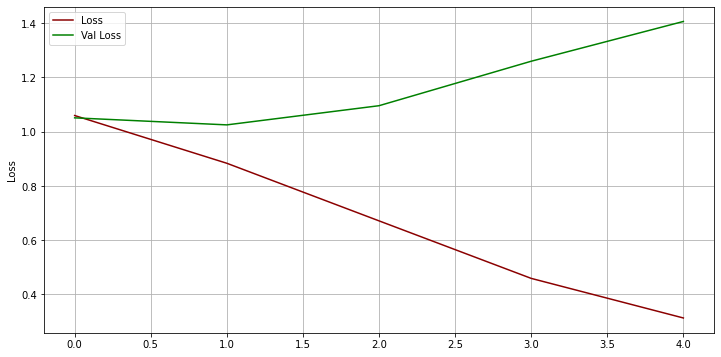

In [60]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

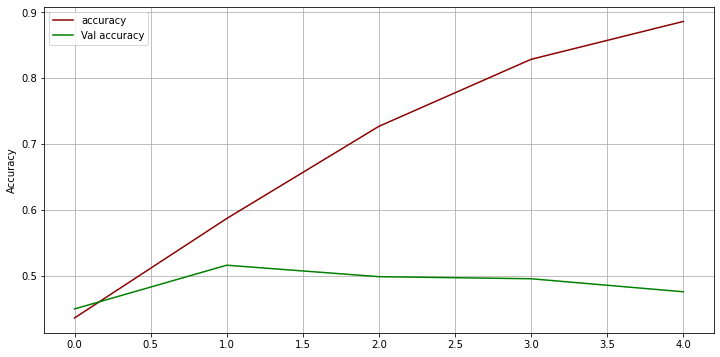

In [61]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()

## AutoKeras

In [63]:
TextClassifier = ak.TextClassifier(
    num_classes=3, 
    multi_label=True, 
    loss=tf.keras.losses.categorical_crossentropy, 
    metrics=['accuracy'],
    project_name="text_classifier",
    max_trials=1,
    objective="val_loss"
)

# fit = TextClassifier.fit(
#     x=np.asarray(pre_X(X_train)), y=one.fit_transform(Y_train.reshape(-1,1)), epochs=10, validation_split=0.2, validation_data=(np.asarray(pre_X(X_test)),one.fit_transform(Y_test.reshape(-1,1)) )
# )

kf = KFold(n_splits=10)
val_accuracy = []
index = []
cont = 0

for train_index, test_index in kf.split(Tweet_preprocessed):
    cont += 1
    
    model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,
        mask_zero=True),
    
    tf.keras.layers.Conv1D(24,6, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')   
    
    ])

    model.compile(
        optimizer= tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.categorical_crossentropy,
        metrics=['accuracy']
    )
    
    Tweet_preprocessed = np.asarray(pre_X(Tweet_preprocessed))
    
    X_train, X_test = Tweet_preprocessed[train_index], Tweet_preprocessed[test_index]
    y_train, y_test = polarity[train_index], polarity[test_index]
    y_train_one = one.fit_transform(y_train.reshape(-1,1))
    y_teste_one = one.fit_transform(y_test.reshape(-1,1))
    
    print("Iter: ",cont)
    print(" ")
    
    fit = TextClassifier.fit(
    x= X_train, y=y_train_one, epochs=5, validation_split=0.2, validation_data=(X_test, y_teste_one )
    )
    
    print(" ")
    val_accuracy.append(fit.history['val_accuracy'])
    
    index.append((train_index,test_index))

INFO:tensorflow:Reloading Oracle from existing project .\text_classifier\oracle.json
INFO:tensorflow:Reloading Tuner from .\text_classifier\tuner0.json
Iter:  1
 
INFO:tensorflow:Oracle triggered exit
Epoch 1/5
357/357 [==============================] - 56s 158ms/step - loss: 0.6022 - accuracy: 0.4936 - val_loss: 0.5733 - val_accuracy: 0.6440
Epoch 2/5
357/357 [==============================] - 58s 162ms/step - loss: 0.5144 - accuracy: 0.6151 - val_loss: 0.5251 - val_accuracy: 0.6109
Epoch 3/5
357/357 [==============================] - 59s 165ms/step - loss: 0.3968 - accuracy: 0.7347 - val_loss: 0.5824 - val_accuracy: 0.5722
Epoch 4/5
357/357 [==============================] - 57s 160ms/step - loss: 0.3109 - accuracy: 0.8081 - val_loss: 0.6632 - val_accuracy: 0.5667
Epoch 5/5
357/357 [==============================] - 59s 166ms/step - loss: 0.2403 - accuracy: 0.8579 - val_loss: 0.7955 - val_accuracy: 0.5509
Instructions for updating:
This property should not be used in TensorFlow 2.0, 

AttributeError: 'NoneType' object has no attribute 'history'

In [ ]:
media_std(val_accuracy)